# ML model: logistic regression

In [4]:
%pylab inline
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('year_2019_full_data.csv')

In [5]:
df

,rank,artist,title,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,1,Lil Nas X Featuring Billy Ray Cyrus,Old Town Road,2YpeDb67231RjR0MgVLzsG,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.000000,0.1130,0.639,136.041,audio_features,spotify:track:2YpeDb67231RjR0MgVLzsG,https://api.spotify.com/v1/tracks/2YpeDb67231R...,https://api.spotify.com/v1/audio-analysis/2Ype...,157067,4
1,2,Post Malone & Swae Lee,Sunflower (Spider-Man: Into The Spider-Verse),3KkXRkHbMCARz0aVfEt68P,0.760,0.479,2,-5.574,1,0.0466,0.5560,0.000000,0.0703,0.913,89.911,audio_features,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4
2,3,Halsey,Without Me,5p7ujcrUXASCNwRaWNHR1C,0.752,0.488,6,-7.050,1,0.0705,0.2970,0.000009,0.0936,0.533,136.041,audio_features,spotify:track:5p7ujcrUXASCNwRaWNHR1C,https://api.spotify.com/v1/tracks/5p7ujcrUXASC...,https://api.spotify.com/v1/audio-analysis/5p7u...,201661,4
3,4,Billie Eilish,Bad Guy,2Fxmhks0bxGSBdJ92vM42m,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.130000,0.1000,0.562,135.128,audio_features,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4
4,5,Post Malone,Wow.,7xQAfvXzm3AkraOtGPWIZg,0.829,0.539,11,-7.359,0,0.2080,0.1360,0.000002,0.1030,0.388,99.960,audio_features,spotify:track:7xQAfvXzm3AkraOtGPWIZg,https://api.spotify.com/v1/tracks/7xQAfvXzm3Ak...,https://api.spotify.com/v1/audio-analysis/7xQA...,149547,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Chase Rice,Eyes On You,5AnSllIrgGsCZzZJkVnApx,0.606,0.652,9,-6.982,1,0.0281,0.3230,0.000000,0.2010,0.476,97.155,audio_features,spotify:track:5AnSllIrgGsCZzZJkVnApx,https://api.spotify.com/v1/tracks/5AnSllIrgGsC...,https://api.spotify.com/v1/audio-analysis/5AnS...,182493,4
96,97,Dan + Shay,All To Myself,08tq1XcHwVt5PHXUo87i0D,0.646,0.781,1,-4.616,1,0.0313,0.2080,0.000000,0.1250,0.565,94.975,audio_features,spotify:track:08tq1XcHwVt5PHXUo87i0D,https://api.spotify.com/v1/tracks/08tq1XcHwVt5...,https://api.spotify.com/v1/audio-analysis/08tq...,169920,4
97,98,Ariana Grande & Social House,Boyfriend,0Ryd8975WihbObpp5cPW1t,0.400,0.795,10,-3.731,0,0.4610,0.1190,0.000000,0.1590,0.702,190.097,audio_features,spotify:track:0Ryd8975WihbObpp5cPW1t,https://api.spotify.com/v1/tracks/0Ryd8975Wihb...,https://api.spotify.com/v1/audio-analysis/0Ryd...,186107,4
98,99,P!nk,Walk Me Home,7DHApOHsIFo7EyfieArYGE,0.652,0.453,1,-6.119,1,0.0445,0.0519,0.000000,0.1790,0.432,88.038,audio_features,spotify:track:7DHApOHsIFo7EyfieArYGE,https://api.spotify.com/v1/tracks/7DHApOHsIFo7...,https://api.spotify.com/v1/audio-analysis/7DHA...,177391,3


In [7]:
np.ones(100).shape

(100,)

In [8]:
# Let's add a column stating that all these tracks are successfull, 'success'=1.0
df['success']=np.ones(100)
df

,rank,artist,title,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,success
0,1,Lil Nas X Featuring Billy Ray Cyrus,Old Town Road,2YpeDb67231RjR0MgVLzsG,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.000000,0.1130,0.639,136.041,audio_features,spotify:track:2YpeDb67231RjR0MgVLzsG,https://api.spotify.com/v1/tracks/2YpeDb67231R...,https://api.spotify.com/v1/audio-analysis/2Ype...,157067,4,1.0
1,2,Post Malone & Swae Lee,Sunflower (Spider-Man: Into The Spider-Verse),3KkXRkHbMCARz0aVfEt68P,0.760,0.479,2,-5.574,1,0.0466,0.5560,0.000000,0.0703,0.913,89.911,audio_features,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4,1.0
2,3,Halsey,Without Me,5p7ujcrUXASCNwRaWNHR1C,0.752,0.488,6,-7.050,1,0.0705,0.2970,0.000009,0.0936,0.533,136.041,audio_features,spotify:track:5p7ujcrUXASCNwRaWNHR1C,https://api.spotify.com/v1/tracks/5p7ujcrUXASC...,https://api.spotify.com/v1/audio-analysis/5p7u...,201661,4,1.0
3,4,Billie Eilish,Bad Guy,2Fxmhks0bxGSBdJ92vM42m,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.130000,0.1000,0.562,135.128,audio_features,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4,1.0
4,5,Post Malone,Wow.,7xQAfvXzm3AkraOtGPWIZg,0.829,0.539,11,-7.359,0,0.2080,0.1360,0.000002,0.1030,0.388,99.960,audio_features,spotify:track:7xQAfvXzm3AkraOtGPWIZg,https://api.spotify.com/v1/tracks/7xQAfvXzm3Ak...,https://api.spotify.com/v1/audio-analysis/7xQA...,149547,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Chase Rice,Eyes On You,5AnSllIrgGsCZzZJkVnApx,0.606,0.652,9,-6.982,1,0.0281,0.3230,0.000000,0.2010,0.476,97.155,audio_features,spotify:track:5AnSllIrgGsCZzZJkVnApx,https://api.spotify.com/v1/tracks/5AnSllIrgGsC...,https://api.spotify.com/v1/audio-analysis/5AnS...,182493,4,1.0
96,97,Dan + Shay,All To Myself,08tq1XcHwVt5PHXUo87i0D,0.646,0.781,1,-4.616,1,0.0313,0.2080,0.000000,0.1250,0.565,94.975,audio_features,spotify:track:08tq1XcHwVt5PHXUo87i0D,https://api.spotify.com/v1/tracks/08tq1XcHwVt5...,https://api.spotify.com/v1/audio-analysis/08tq...,169920,4,1.0
97,98,Ariana Grande & Social House,Boyfriend,0Ryd8975WihbObpp5cPW1t,0.400,0.795,10,-3.731,0,0.4610,0.1190,0.000000,0.1590,0.702,190.097,audio_features,spotify:track:0Ryd8975WihbObpp5cPW1t,https://api.spotify.com/v1/tracks/0Ryd8975Wihb...,https://api.spotify.com/v1/audio-analysis/0Ryd...,186107,4,1.0
98,99,P!nk,Walk Me Home,7DHApOHsIFo7EyfieArYGE,0.652,0.453,1,-6.119,1,0.0445,0.0519,0.000000,0.1790,0.432,88.038,audio_features,spotify:track:7DHApOHsIFo7EyfieArYGE,https://api.spotify.com/v1/tracks/7DHApOHsIFo7...,https://api.spotify.com/v1/audio-analysis/7DHA...,177391,3,1.0


In [9]:
X = df[['danceability', 'energy', 'key', 'loudness']].values
y = df['success']

In [11]:
def draw(clf,X,y,h=0.05):
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")

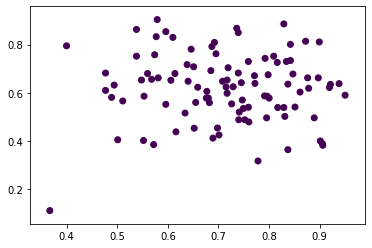

In [12]:
plt.scatter(df['danceability'],df['energy'],c=df['success']);

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
clf = LogisticRegression()

In [15]:
clf.fit(X,y)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0
